# Project: Predictive Modeling for Agriculture

### Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

GOAL: Build a multi-class Logistic Regression model to predict categories of "crop" with a F1 score of more than 0.5.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

## Data Exploration

In [3]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [4]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [5]:
crops.groupby('crop').N.count()

crop
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: N, dtype: int64

In [6]:
crops_av=set(crops.crop)
print(crops_av, len(crops_av))

{'mothbeans', 'mungbean', 'muskmelon', 'mango', 'pomegranate', 'apple', 'coffee', 'grapes', 'chickpea', 'kidneybeans', 'papaya', 'pigeonpeas', 'coconut', 'orange', 'maize', 'blackgram', 'cotton', 'jute', 'watermelon', 'rice', 'banana', 'lentil'} 22


## Train / Test sets creation

In [7]:
X = crops.drop('crop', axis=1)
y= crops['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

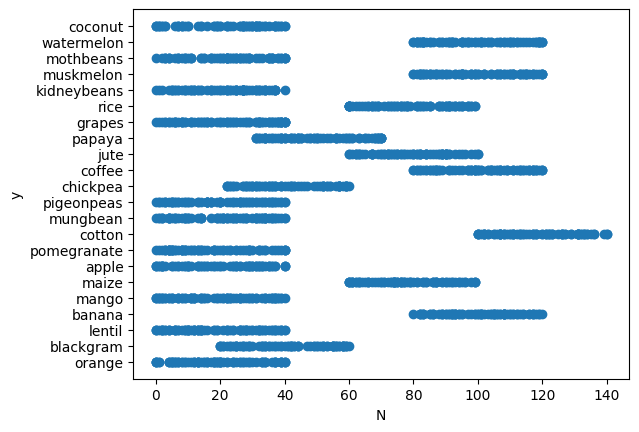

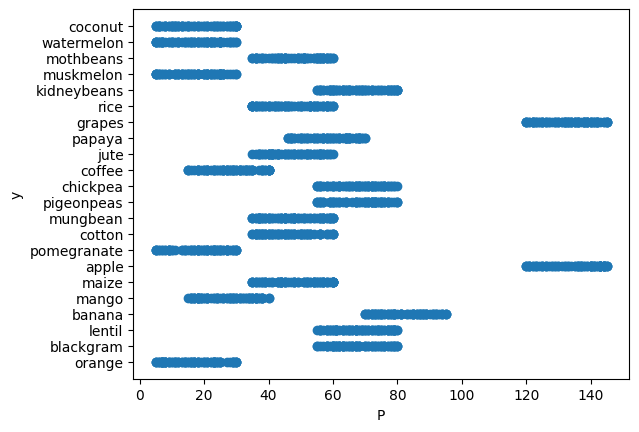

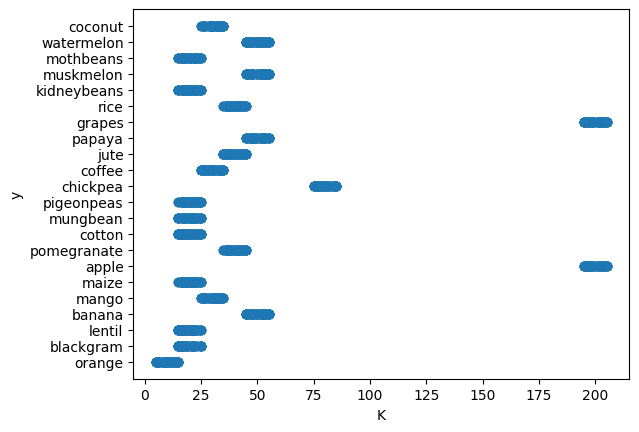

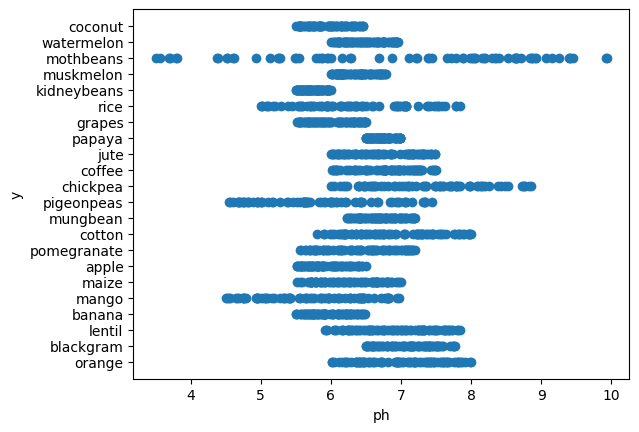

In [8]:
for c in X_train.columns:
    X_N = X_train[[c]]
    X_N = X_N.values.reshape(-1, 1)
    plt.scatter(X_N, y_train)
    plt.ylabel('y')
    plt.xlabel(c)
    plt.show()

## Model Creation using LogisticRegression()

In [9]:
# Get the column names (features) of the training dataset
features = X_train.columns

# Create an empty list to store feature performance scores
feature_performance = []

# Define K-Fold cross-validation with 6 splits
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Iterate through each feature for evaluation
for f in features:
    # Create a pipeline with feature scaling and logistic regression
    model = make_pipeline(StandardScaler(), LogisticRegression(C=25, max_iter=2000, multi_class='multinomial', random_state=42))
    
    # Fit the model on the training data using only the current feature
    model.fit(X_train[[f]], y_train)
    
    # Make predictions on the test data using only the current feature
    y_pred = model.predict(X_test[[f]])
    
    # Calculate and store the F1-score for the current feature
    feature_performance.append(f1_score(y_test, y_pred, average='weighted'))

# Print the F1-scores for each feature
for i in range(len(features)):
    print(f'F1-score for {features[i]}: {feature_performance[i]}')

F1-score for N: 0.1020973317588429
F1-score for P: 0.11732672979934494
F1-score for K: 0.1547018602121903
F1-score for ph: 0.048036482039707236


<Axes: >

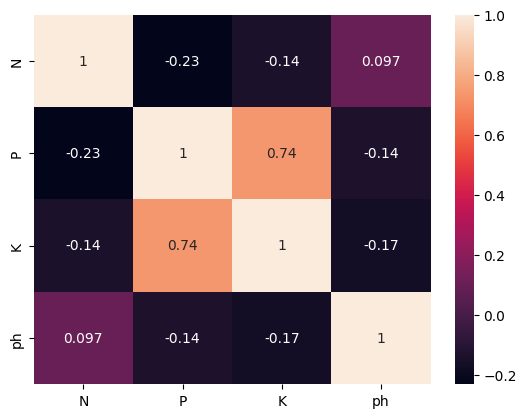

In [10]:
# Calculate the correlation matrix for the features in DataFrame X
correlation = X.corr()

# Create a heatmap visualization of the correlation matrix using seaborn
# annot=True displays the correlation values in each cell of the heatmap
sns.heatmap(correlation, annot=True)

In [11]:
# Remove columns 'crop' and 'P' from the DataFrame 'crops' and store the result in 'X_features'
X_features = crops.drop(['crop', 'P'], axis=1)

In [12]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [13]:
model_2= make_pipeline(StandardScaler(), LogisticRegression(C=25, max_iter=2000, multi_class='multinomial', random_state=42))
model_2.fit(X_trainf, y_trainf)
y_predf = model_2.predict(X_testf)
model_performance=(f1_score(y_testf, y_predf, average='weighted'))
print(model_performance)

0.5803906017154266
